In [5]:
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# To find an appropriate number of clusters, I will be performing 
# some elbow analysis on all the combinations of features that are correlated.

# I know that if weekdays are included (one-hot) the optimal k given by the
# elbow method is 7. Consider if only the traffic data is included (24 hr 
# periods and flux/previous flux): how many clusters should we have. Apply 
# same logic to weather data. 
# Multiply total numbers of optimal clusters from these 3.

In [7]:
from sklearn.cluster import KMeans

data = pd.read_csv(r'./data/SteamboatDataScaled.csv', index_col=0)
data.head()

,DATE,SNOW,SNWD,TMAX,TMIN,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,HOUR9,HOUR10,HOUR11,HOUR12,HOUR13,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23,Flux,PrevFlux24,PrevFlux48,SNOW24,SNOW48,SNOW7,MON,TUE,WED,THU,FRI,SAT,SUN
0,2003-01-01,0.038462,0.217391,0.544643,0.419643,-0.053790,0.007335,-0.014670,-0.024450,-0.017115,-0.102689,-0.026895,0.061125,-0.012225,-0.210269,-0.290954,-0.183374,-0.288509,-0.246944,-0.163814,-0.075795,-0.022005,0.053790,0.119804,0.053790,-0.007335,0.014670,-0.046455,-0.014670,0.437803,0.437803,0.455147,0.038462,0.038462,0.038462,0.0,0.5,1.0,0.5,0.0,0.0,0.0
1,2003-01-02,0.027473,0.434783,0.580357,0.321429,0.000000,-0.004890,0.002445,-0.034230,-0.107579,-0.210269,-0.224939,0.149144,-0.031785,-0.046455,-0.154034,-0.039120,-0.117359,-0.139364,-0.078240,-0.097800,0.119804,-0.178484,0.078240,-0.019560,-0.044010,-0.036675,-0.090465,-0.022005,0.450279,0.437803,0.455147,0.038462,0.038462,0.038462,0.0,0.0,0.5,1.0,0.5,0.0,0.0
2,2003-01-03,0.000000,0.434783,0.517857,0.321429,-0.007335,0.014670,0.051345,-0.044010,-0.127139,-0.139364,-0.281174,0.139364,0.229829,0.012225,-0.166259,-0.014670,-0.014670,-0.102689,-0.092910,-0.178484,-0.017115,0.095355,0.207824,0.078240,0.031785,0.066015,-0.041565,0.022005,0.530168,0.450279,0.383302,0.027473,0.065934,0.065934,0.0,0.0,0.0,0.5,1.0,0.5,0.0
3,2003-01-04,0.000000,0.413043,0.651786,0.419643,0.007335,-0.026895,0.019560,-0.002445,-0.124694,-0.139364,-0.308068,-0.105134,-0.058680,-0.212714,-0.122249,-0.063570,0.039120,0.004890,0.009780,-0.056235,0.166259,0.110024,0.200489,0.105134,0.048900,-0.068460,-0.053790,-0.031785,0.500931,0.530168,0.448928,0.000000,0.027473,0.065934,0.0,0.0,0.0,0.0,0.5,1.0,0.5
4,2003-01-05,0.000000,0.413043,0.625000,0.491071,-0.004890,0.007335,0.017115,-0.007335,-0.056235,-0.195599,-0.151589,-0.139364,-0.056235,-0.256724,-0.388753,-0.425428,-0.361858,-0.242054,-0.217604,-0.039120,0.083130,0.173594,0.056235,0.075795,0.019560,0.036675,-0.031785,-0.024450,0.389199,0.500931,0.484917,0.000000,0.000000,0.065934,0.5,0.0,0.0,0.0,0.0,0.5,1.0


In [8]:
# Normalize for weekday so we only cluster on other features

weekdays = ['MON','TUE','WED','THU','FRI','SAT','SUN']
dataByDay = []
for day in weekdays:
    dataByDay.append(data[data[day] == 1])
    

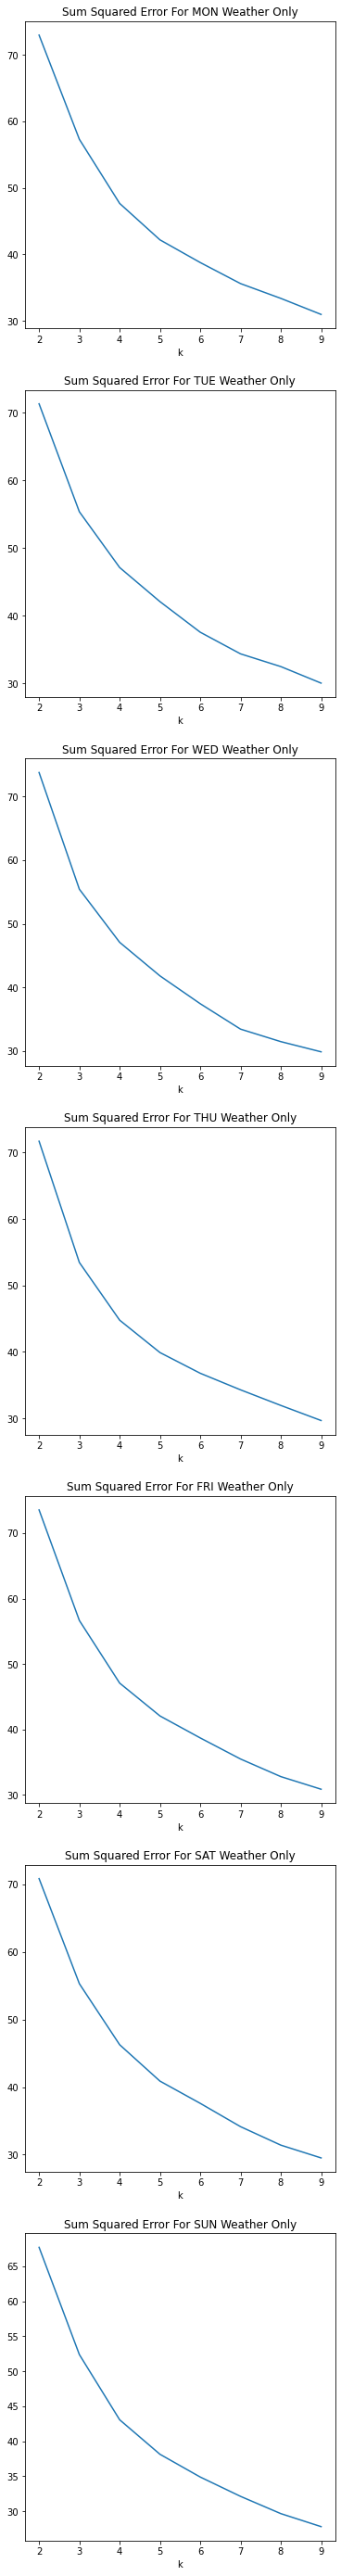

In [9]:
# Only 

fig, ax = plt.subplots(7,figsize=(6,50))

for i in range(len(dataByDay)):
    err = []
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k).fit(dataByDay[i].drop(columns=['HOUR0','HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23','Flux','PrevFlux24','PrevFlux48','DATE']))
        err.append(kmeans.inertia_)

    ax[i].set_title("Sum Squared Error For " + weekdays[i] + " Weather Only")
    ax[i].set_xlabel("k")
    ax[i].plot(np.arange(2,2+len(err)),err)

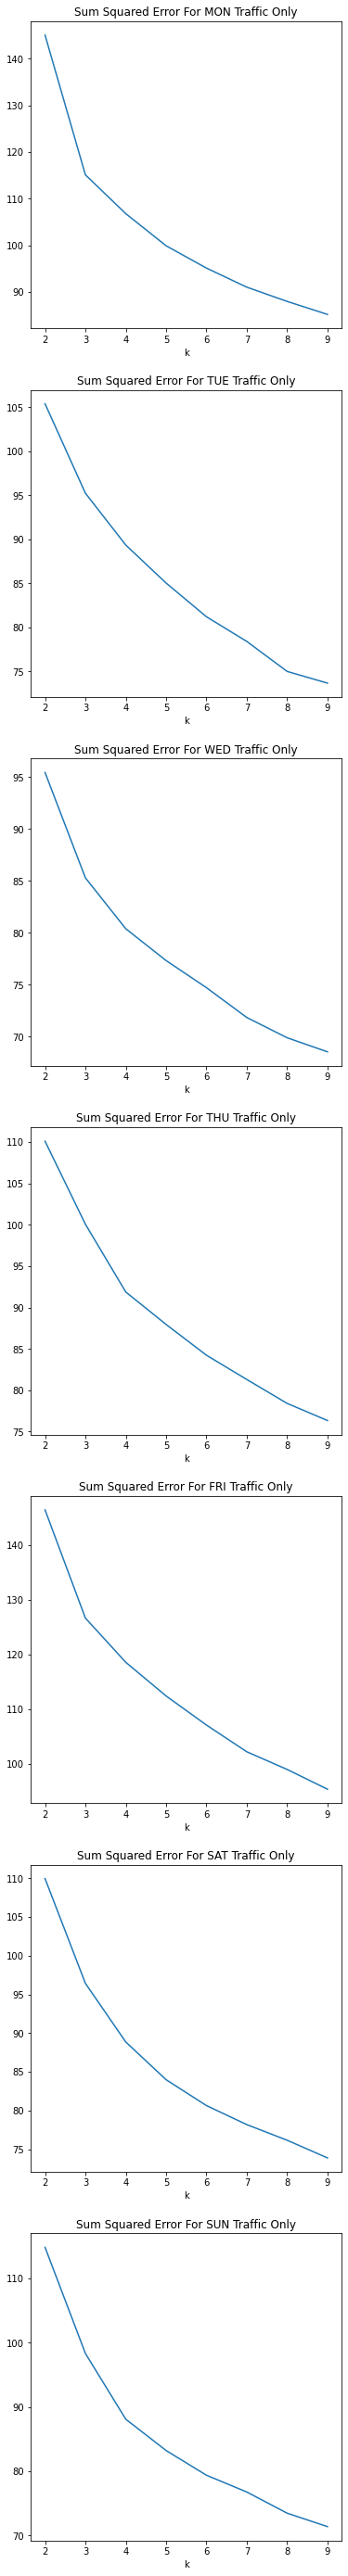

In [10]:
fig, ax = plt.subplots(7,figsize=(6,50))

for i in range(len(dataByDay)):
    err = []
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k).fit(dataByDay[i][['HOUR0','HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23','Flux','PrevFlux24','PrevFlux48']])
        err.append(kmeans.inertia_)

    ax[i].set_title("Sum Squared Error For " + weekdays[i] + " Traffic Only")
    ax[i].set_xlabel("k")
    ax[i].plot(np.arange(2,2+len(err)),err)

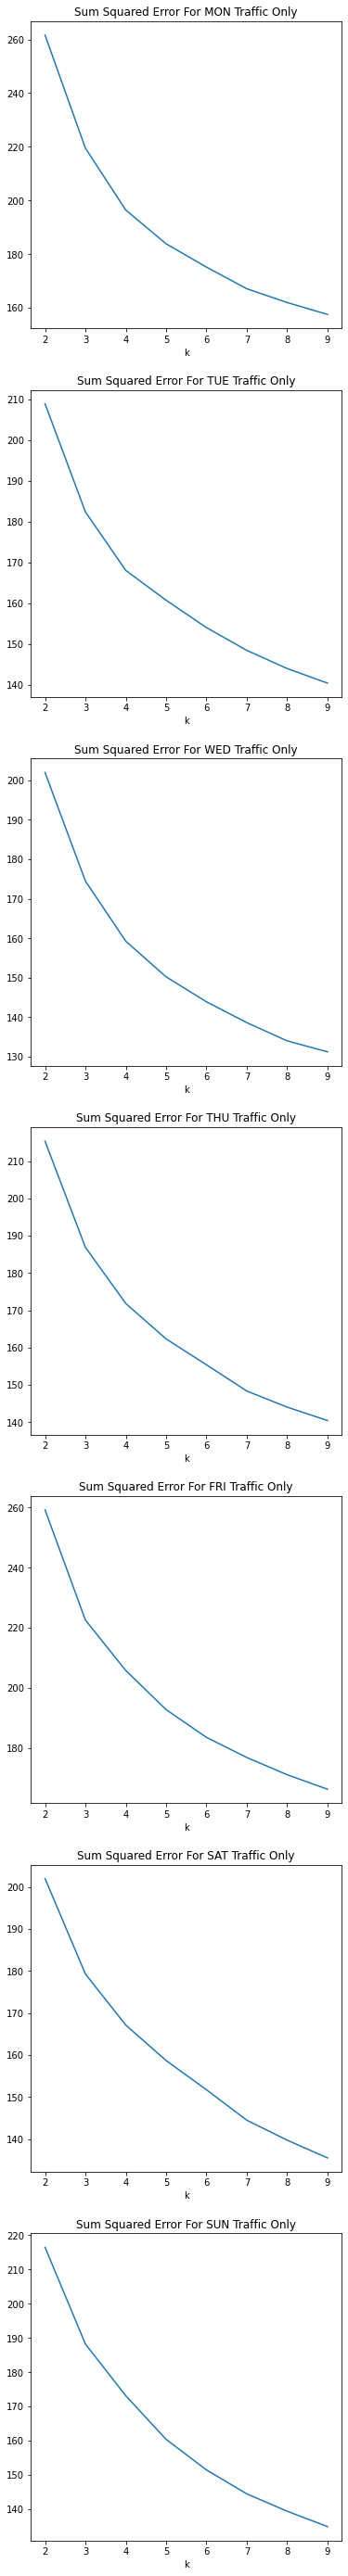

In [11]:
fig, ax = plt.subplots(7,figsize=(6,50))

for i in range(len(dataByDay)):
    err = []
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k).fit(dataByDay[i].drop(columns=['DATE']))
        err.append(kmeans.inertia_)

    ax[i].set_title("Sum Squared Error For " + weekdays[i] + " Traffic Only")
    ax[i].set_xlabel("k")
    ax[i].plot(np.arange(2,2+len(err)),err)

In [12]:
# Though each of the weather data and traffic data tend to optimize at 3
# clusters when only considering one of them, there are enough correlations
# between the two that k=3 seems optimal for each weekday. 
# There will by definition be overlap between weekdays but all important 
# variance will be captured with k ~ 20 clusters on the whole dataset. 

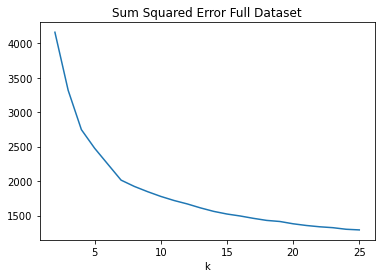

In [13]:
err = []
for i in range(2,26):
    kmeans = KMeans(n_clusters=i).fit(data.drop(columns="DATE"))
    err.append(kmeans.inertia_)
    
plt.xlabel("k")
plt.title("Sum Squared Error Full Dataset")
plt.plot(np.arange(2,26),err)